<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="Stock.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size= 24px>
                    <b>Stock Market Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement


To predict the next day's closing price of a stock using historical stock data.

Stock prices fluctuate daily due to various factors. The goal is to build a predictive model using past stock prices to estimate the stock's 
closing price for the next day


## Data Definition


**Close:** The closing price of the S&P 500 index<br> 

**Volume** The trading volume of the S&P 500 index<br>

**Open** The opening price of the S&P 500 index<br>

**High** The highest price of the S&P 500 index<br>

**Low** The lowest price of the S&P 500 index<br>

**Dividends** The dividend yield of the S&P 500 index<br>

**Stock Splits** The stock split history of the S&P 500 index<br>

**Tomorrow** The closing price of the S&P 500 index shifted by one day<br>

**Target** A binary indicator of whether the tomorrow's closing price is higher than today's closing price<br>


<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>


In [73]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

plt.rcParams['figure.figsize'] = [15,8]

<a id='RD'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# create the sp500 object using yfinance
sp500 = yf.Ticker("^GSPC")

# convert the sp500 object to a Pandas DataFrame
sp500_df = sp500.history(period="max")

# display the top 5 rows of the dataframe
sp500_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


#### Lets take a glance at our dataframe and see how it looks

#### Dimensions of the data

In [77]:
# 'shape' function gives the total number of rows and columns in the data
sp500_df.shape

(24327, 7)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [79]:
# 'dtypes' gives the data type for each column
sp500_df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear that the data type of all the variables except 'Volume' is float64. The data type of 'Volume'  is int64.<br><br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [81]:
sp500_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset, we have both numerical and categorical variables. Now we check for summary statistics of all the variables.<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object) 
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use the describe()**

In [83]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
sp500_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,24327.000000,24327.000000,24327.000000,24327.000000,2.432700e+04,24327.0,24327.0
mean,629.759215,653.294480,645.503680,649.645484,9.139167e+08,0.0,0.0
std,1075.409900,1070.257329,1058.330635,1064.666054,1.623109e+09,0.0,0.0
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,9.720000,24.714999,24.714999,24.714999,1.535000e+06,0.0,0.0
50%,43.139999,103.300003,101.620003,102.419998,2.062000e+07,0.0,0.0
75%,1042.229980,1049.255005,1033.400024,1042.674988,1.013500e+09,0.0,0.0
max,5875.620117,5878.459961,5846.109863,5864.669922,1.145623e+10,0.0,0.0


<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

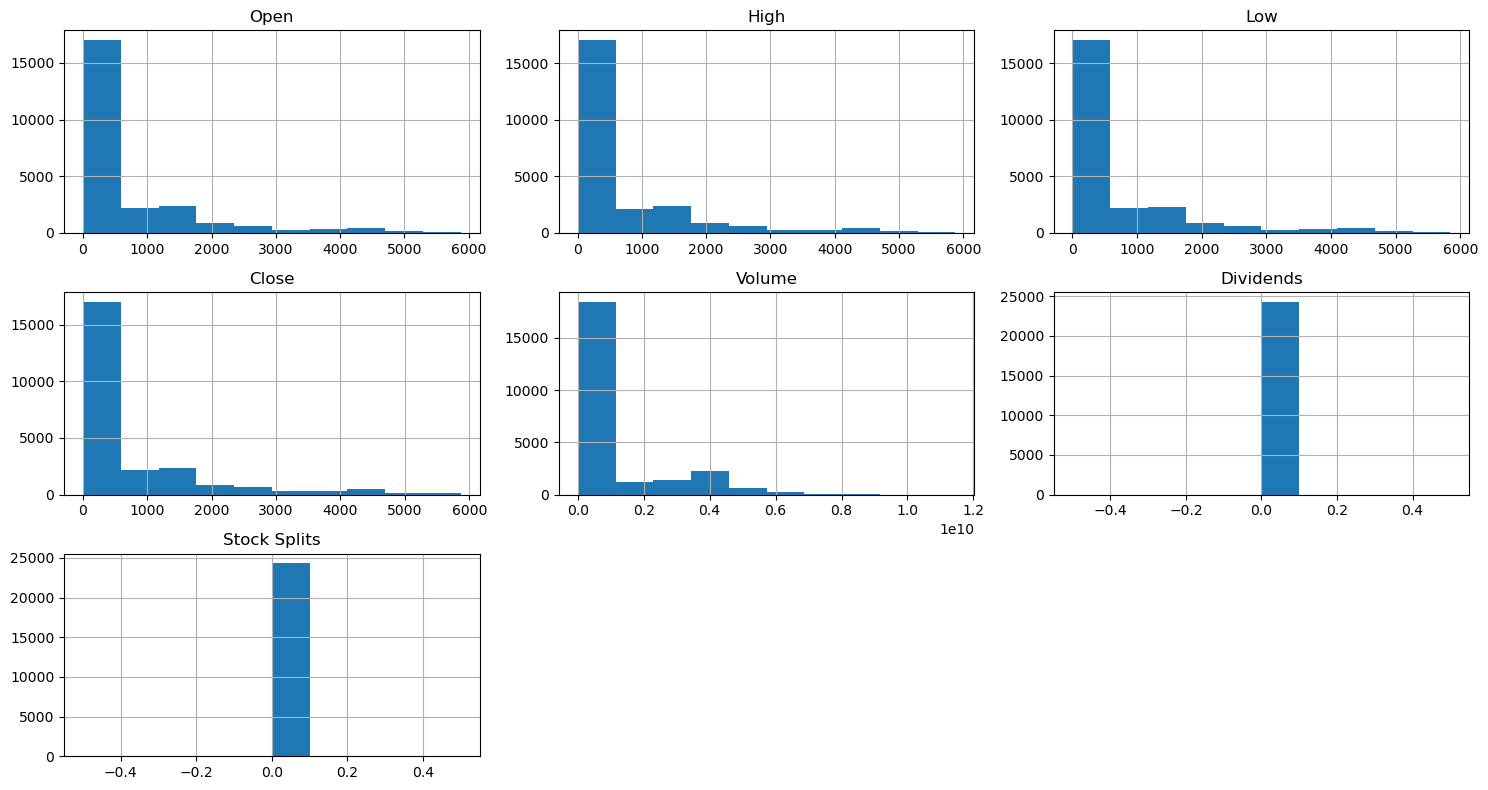

In [85]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
sp500_df.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

<a id='correlation'></a>
### 4.1.4 Correlation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Compute a correlation matrix**

In [87]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = sp500_df.corr()

# print the correlation matrix
corrmat

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999359,0.999350,0.999327,0.805229,NaN,NaN
High,0.999359,1.000000,0.999958,0.999970,0.803966,NaN,NaN
Low,0.999350,0.999958,1.000000,0.999974,0.802206,NaN,NaN
Close,0.999327,0.999970,0.999974,1.000000,0.803070,NaN,NaN
Volume,0.805229,0.803966,0.802206,0.803070,1.000000,NaN,NaN
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Plot the heatmap for the diagonal correlation matrix**

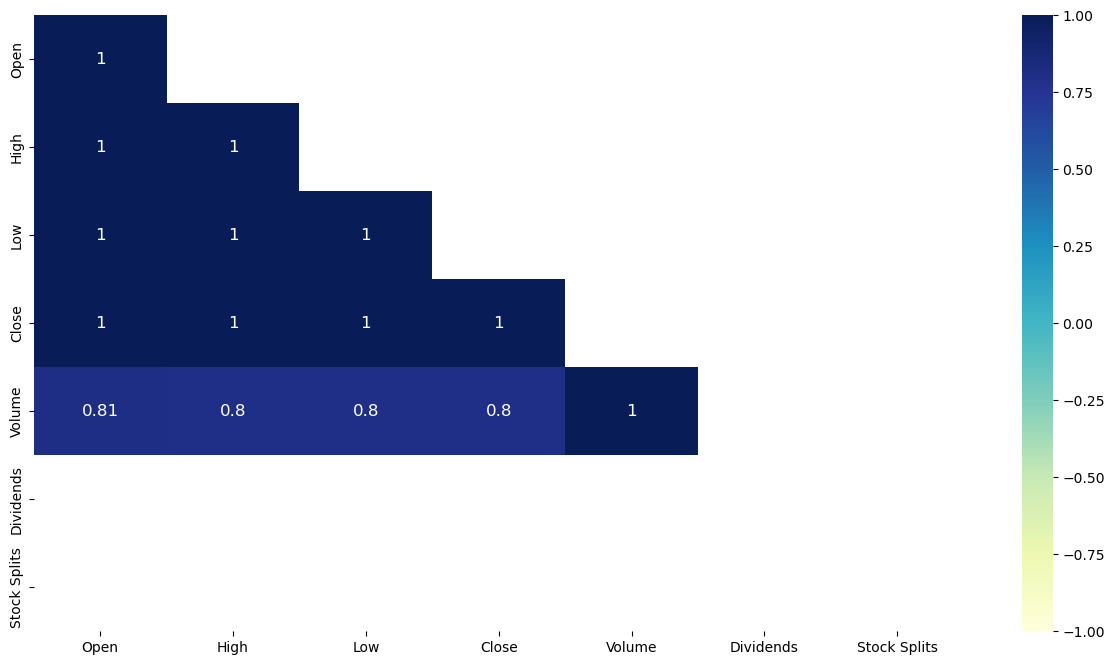

In [89]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# display the plot
plt.show()

<a id='outliers'></a>
### 4.1.5 Discover Outliers 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To detect outliers in numeric data, we perform the following:<br><br>
                    1. Plot the boxplot for numeric data<br>
                    2. Note the variables in which outliers are present<br>
                    3. Remove outliers by IQR method<br> 
                    4. Plot the boxplot to recheck for outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

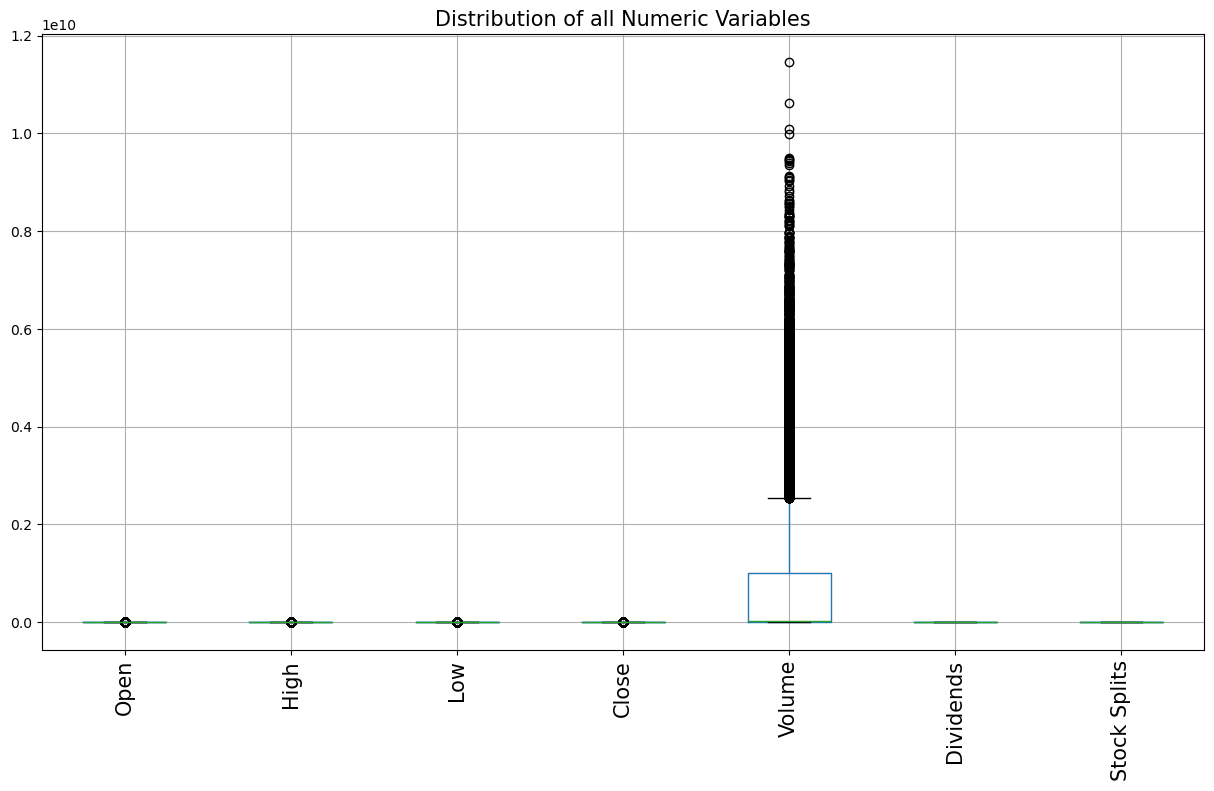

In [91]:
# plot a boxplot to visualize the outliers in all the numeric variables
sp500_df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()



#### Some boxplots of variables are not seen because of the extreme values im other variables. So let's plot a separate boxplot for these variables

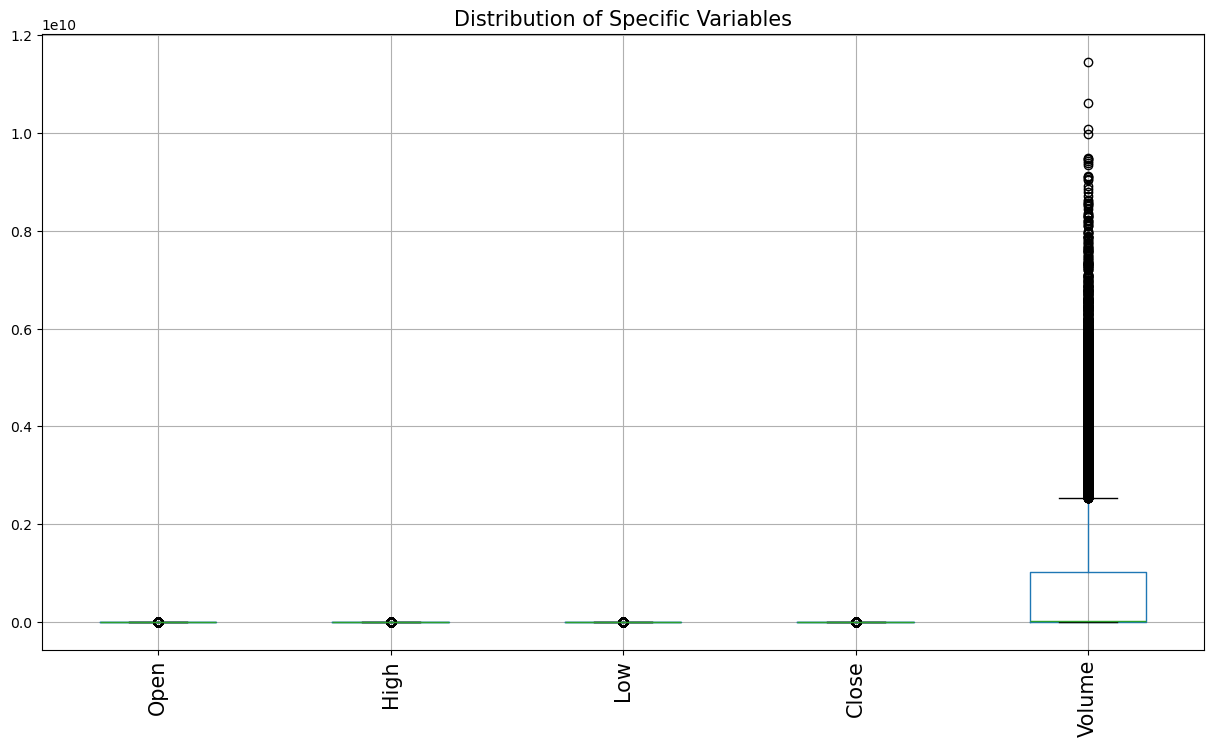

In [93]:
# plot a boxplot to visualize the outliers in specific variables
sp500_df.drop(['Dividends', 'Stock Splits'], axis = 1).boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Specific Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

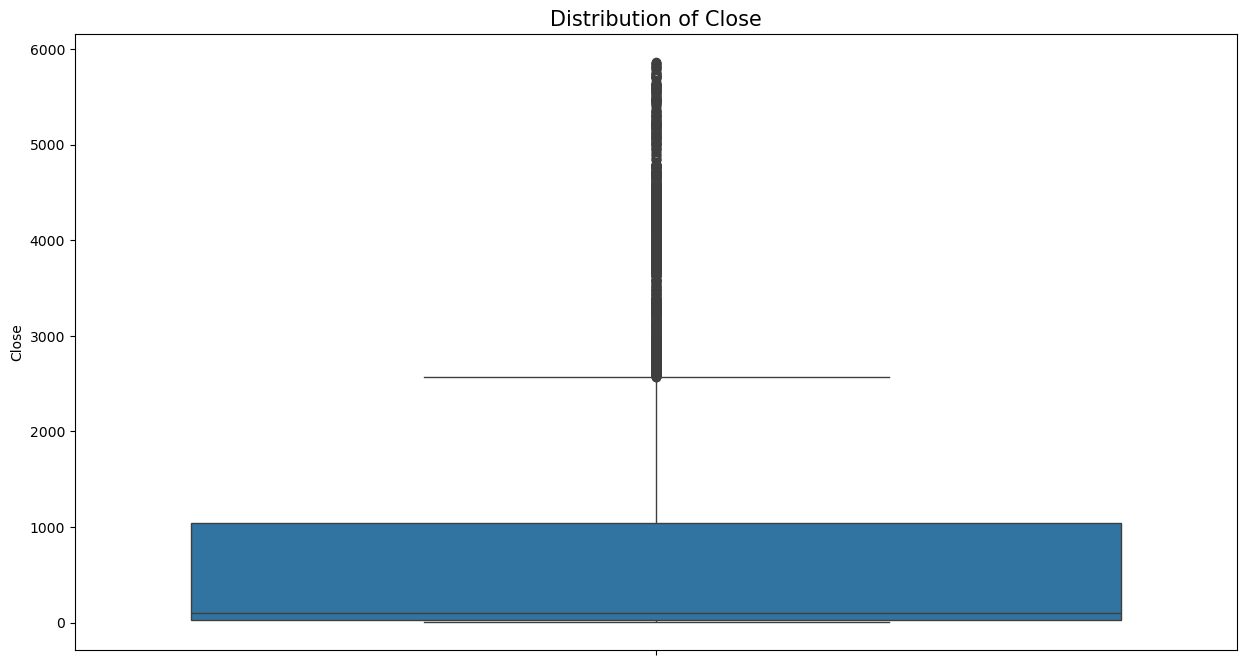

In [95]:
# plot boxplots for Close
sns.boxplot(sp500_df['Close'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Close', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

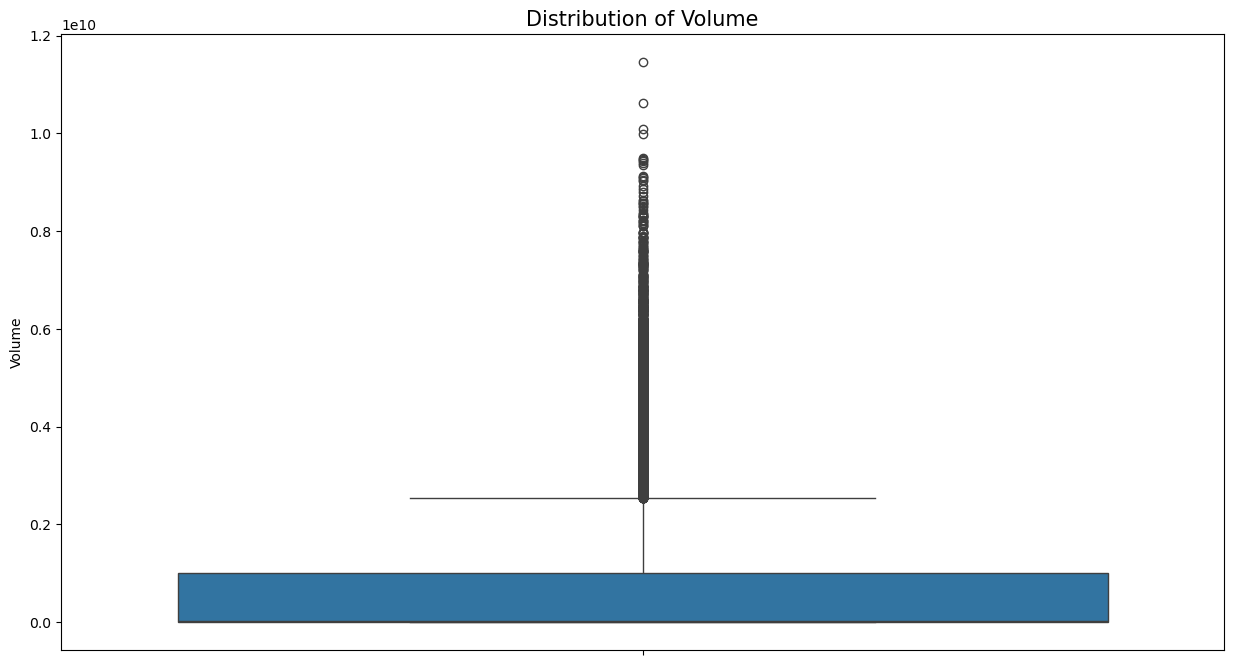

In [97]:
# plot boxplots for Volume
sns.boxplot(sp500_df['Volume'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Volume', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**2. Note the variables for which outliers are present**

##### Based on the boxplot analysis, the following variables in the S&P 500 dataset have outliers:
**Open:** The opening price of the S&P 500 index has outliers, indicating that there are some unusual values in the data.<br> 

**High:** The highest price of the S&P 500 index has outliers, suggesting that there are some extreme values in the data.<br>

**Low:** The lowest price of the S&P 500 index has outliers, indicating that there are some unusual values in the data.<br>

**Close:** The closing price of the S&P 500 index has outliers, suggesting that there are some extreme values in the data.<br>

**Volume:** The trading volume of the S&P 500 index has outliers, indicating that there are some unusual values in the data.<br>


**3. Remove outliers by IQR method**

In [99]:
# calculate the first quartile
Q1 = sp500_df.quantile(0.25)

# calculate the third quartile
Q3 = sp500_df.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Open            1.032510e+03
High            1.024540e+03
Low             1.008685e+03
Close           1.017960e+03
Volume          1.011965e+09
Dividends       0.000000e+00
Stock Splits    0.000000e+00
dtype: float64


In [101]:
# remove the outliers from the dataframe 'sp500_df'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
sp500_df = sp500_df[~((sp500_df < (Q1 - 1.5 * IQR)) | (sp500_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
sp500_df = sp500_df.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

**4. Plot the boxplot to recheck for outliers**

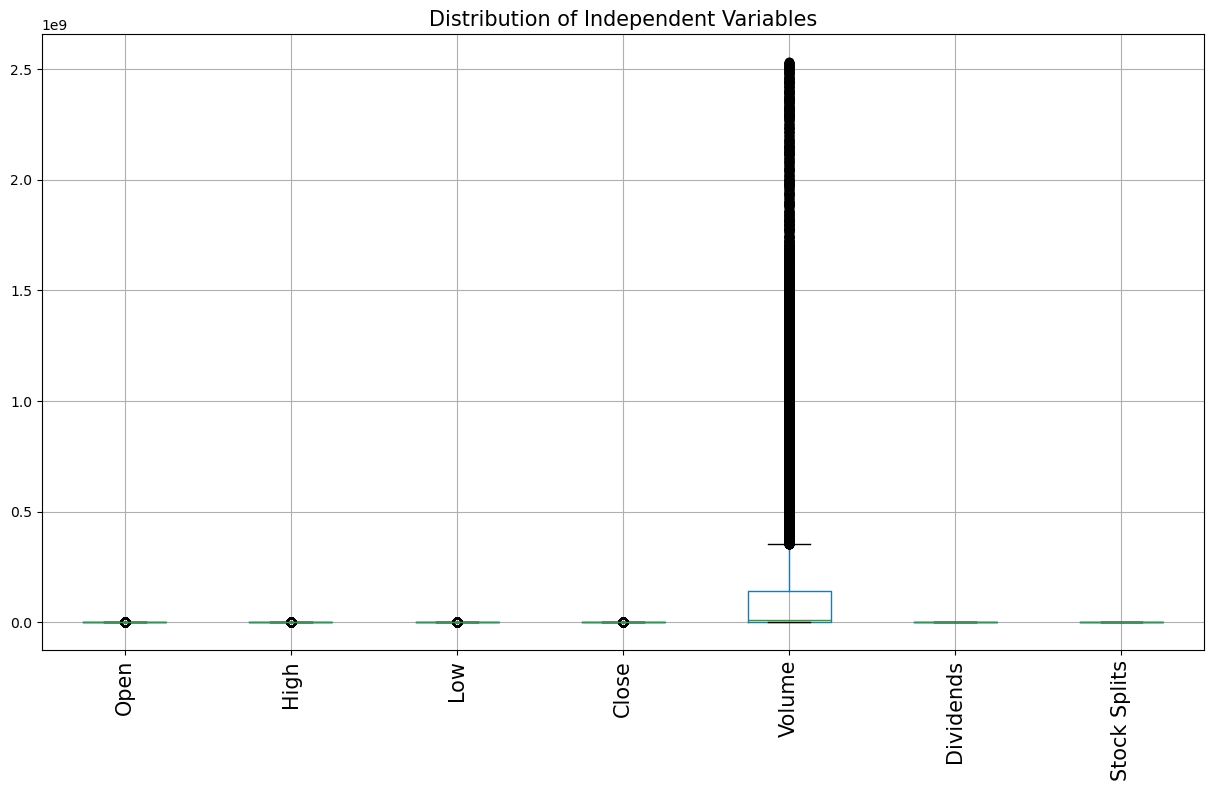

In [103]:
# plot multiple boxplots
sp500_df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data.

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.

In [105]:
# check the shape of the data after removal of outliers 
sp500_df.shape

(19839, 7)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The output shows a reduction in the number of rows. Thus we may say that the potential outliers have been removed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

In [107]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = sp500_df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (sp500_df.isnull().sum()*100/sp500_df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Dividends,0,0.0
Stock Splits,0,0.0


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are no missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We plot a heatmap for visualization of missing values.

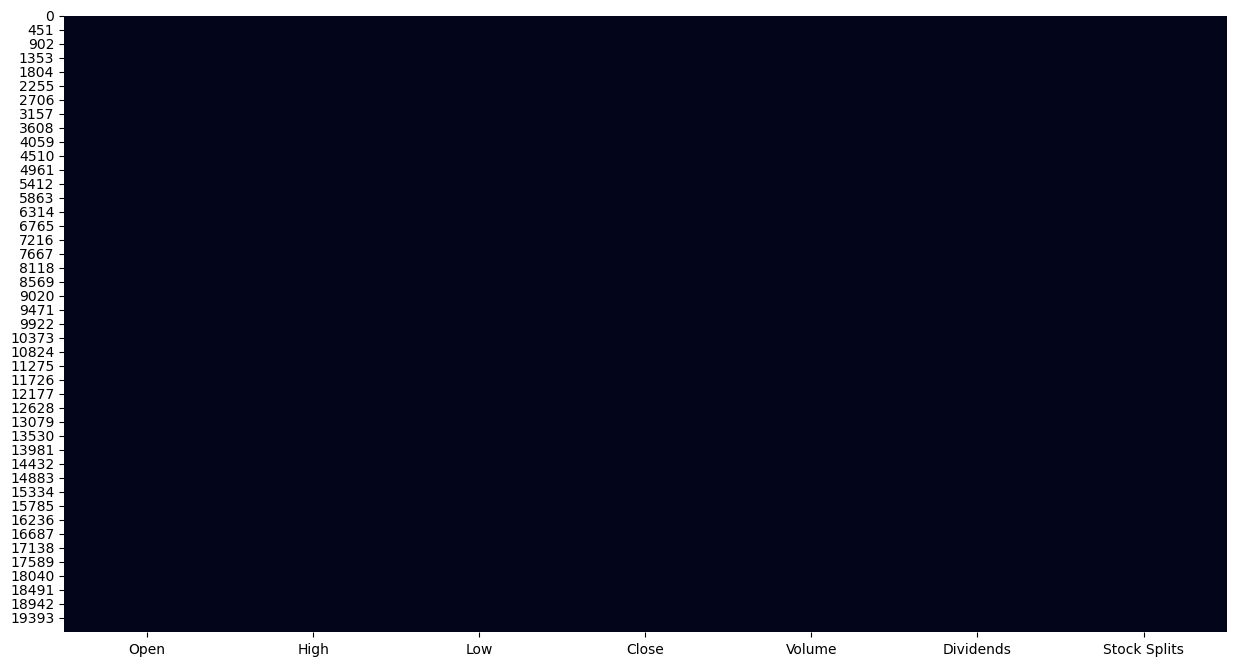

In [109]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(sp500_df.isnull(), cbar=False)

# display the plot
plt.show()

The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no missing values.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the target variable from the independent variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

#### Initial Dataframe

In [111]:
sp500_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
5,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
6,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
7,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
8,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0
9,17.580000,17.580000,17.580000,17.580000,0,0.0,0.0


#### Graph for Opening and closing value of stock price

<Axes: >

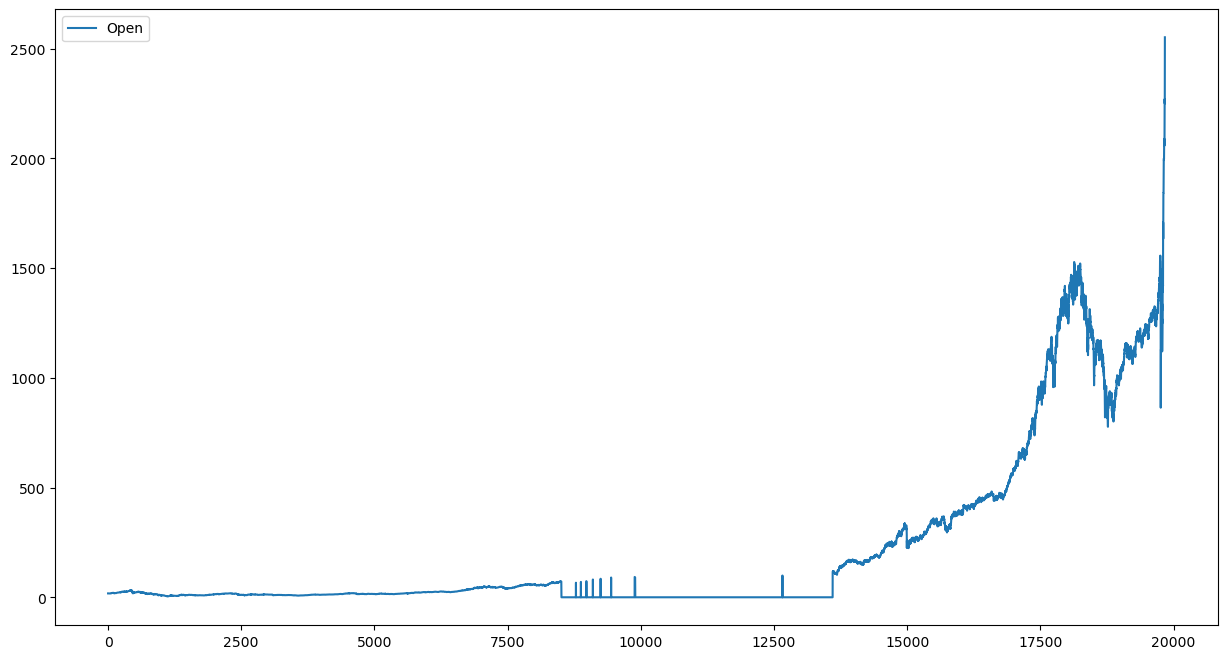

In [113]:
sp500_df.plot(y="Open", use_index=True)

<Axes: >

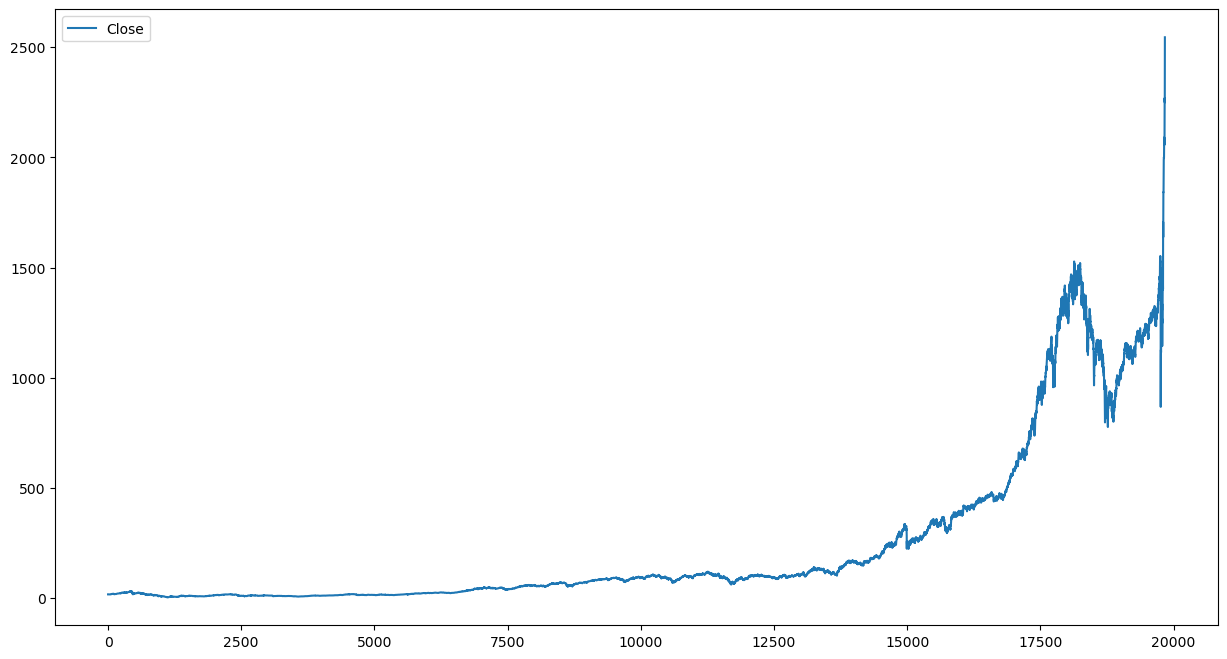

In [115]:
sp500_df.plot(y="Close", use_index=True)

#### Deletion of Unwanted Columns

In [117]:
# delete the 'Dividends' and 'Stock Splits' columns
del sp500_df["Dividends"]
del sp500_df["Stock Splits"]
sp500_df.head(5)

,Open,High,Low,Close,Volume
0,17.660000,17.660000,17.660000,17.660000,0
1,17.760000,17.760000,17.760000,17.760000,0
2,17.719999,17.719999,17.719999,17.719999,0
3,17.549999,17.549999,17.549999,17.549999,0
4,17.660000,17.660000,17.660000,17.660000,0


#### Creation of new Columns

In [119]:

# create a new column 'Tomorrow' which is the closing price shifted by one day
sp500_df["Tomorrow"] = sp500_df["Close"].shift(-1)

# create a new column 'Target' which is a binary indicator of whether the tomorrow's closing price
sp500_df["Target"] = (sp500_df["Tomorrow"] > sp500_df["Close"]).astype(int)

sp500_df.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
0,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
2,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
3,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
4,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
5,17.500000,17.500000,17.500000,17.500000,0,17.370001,0
6,17.370001,17.370001,17.370001,17.370001,0,17.350000,0
7,17.350000,17.350000,17.350000,17.350000,0,17.469999,1
8,17.469999,17.469999,17.469999,17.469999,0,17.580000,1
9,17.580000,17.580000,17.580000,17.580000,0,17.290001,0


#### Filteration of data

In [121]:
# filter the data to include only rows from 1990-01-01 onwards
sp500_df = sp500_df.loc["1990-01-01":].copy()

# 5.RandomForestClassifier

Random Forest Classifier is a classification machine learning algorithm used to predict the class of an observation. This algorithm combines multiple decision trees to determine the class of an observation. To combine the predictions, it considers the voting or averaging of the outputs from each tree.

#### Spliting the data into training and testing sets

In [123]:
train = sp500_df.iloc[:-100] 
test = sp500_df.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]

#### Train a random forest classifier model

In [125]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

#### Make predictions on the testing set

In [127]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

#### Evaluate the model's performance using precision score

In [129]:
precision_score(test["Target"], preds)

0.6571428571428571

#### Visualize the predictions using a plot

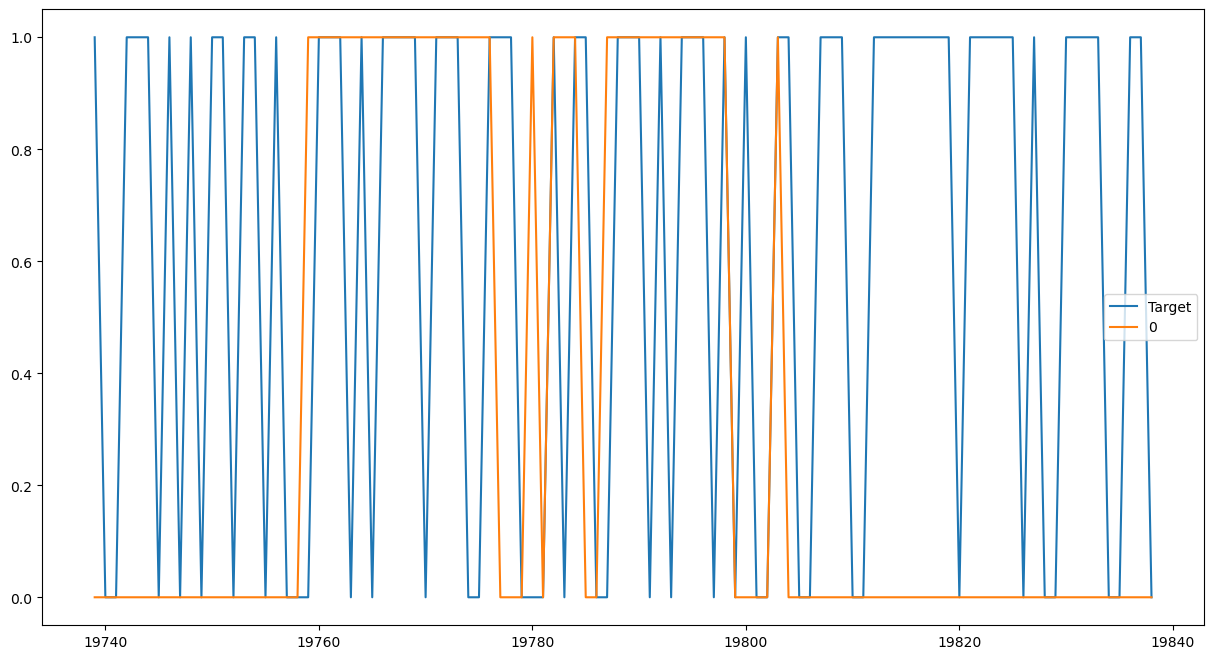

In [131]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()
plt.show()

#### Define a function to predict and backtest the model

In [133]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

#### Backtest the model and evaluate its performance

In [137]:
predictions = backtest(sp500_df, model, predictors)
predictions["Predictions"].value_counts()

Predictions
0    8923
1    6425
Name: count, dtype: int64

In [139]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5170428015564202

In [141]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.525606
0    0.474394
Name: count, dtype: float64

#### Add new features to the dataset using rolling averages and trend indicators

In [143]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500_df.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500_df[ratio_column] = sp500_df["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500_df[trend_column] = sp500_df.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

sp500_df = sp500_df.dropna()

In [148]:
sp500_df.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
2991,12.44,12.44,12.44,12.44,0,12.38,0,1.002417,1.0,1.004522,2.0,0.981498,24.0,1.031177,124.0,0.914925,494.0
2992,12.38,12.38,12.38,12.38,0,12.31,0,0.997583,1.0,0.999516,2.0,0.977703,24.0,1.026350,123.0,0.910574,493.0
2993,12.31,12.31,12.31,12.31,0,12.42,1,0.997165,0.0,0.994346,2.0,0.972879,24.0,1.020689,123.0,0.905500,492.0
2994,12.42,12.42,12.42,12.42,0,12.46,1,1.004448,1.0,1.002745,2.0,0.982051,25.0,1.029957,123.0,0.913657,493.0
2995,12.46,12.46,12.46,12.46,0,12.63,1,1.001608,2.0,1.004677,3.0,0.985759,25.0,1.033503,123.0,0.916673,493.0


#### Refine the model by adjusting hyperparameters and adding new features

In [150]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [154]:
predictions = backtest(sp500_df, model, new_predictors)

In [156]:
predictions["Predictions"].value_counts()

Predictions
0.0    11626
1.0     2721
Name: count, dtype: int64

In [160]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6012495406100699